# Multiple Linear Regression Model

### Bike Rental Prediction

## Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

The company wants to know:

•	Which variables are significant in predicting the demand for shared bikes.

•	How well those variables describe the bike demands.

The Steps we will follow in this exercise are as follows:

1. Reading, understanding and visualising the data
2. Preparing the data for modelling (train-test split, rescaling etc.)
3. Training the model
4. Residual analysis
5. Predictions and evaluation on the test set





### Step 1: Reading and Understanding the data

#### Import NumPy and Pandas and read the Bike Sharing dataset

In [86]:
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [4]:
# read the dataset
bike = pd.read_csv(r'C:\Dell WinLogs\day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Dropping of unnecessary Variables ('instant', 'dteday', 'casual', and 'registered')
bike = bike.drop(['instant', 'dteday', 'casual', 'registered'], axis=1)

In [114]:
bike.shape

(730, 12)

In [115]:
# Check missing Values
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [116]:
# There is no missing values in the dataframe

In [37]:
# Converting some numeric values to categorical data

bike_2=bike[['season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt']]

bike_2['mnth'] = bike_2['mnth'].apply(lambda x: calendar.month_abbr[x])


# Mapping seasons

bike_2.season = bike_2.season.map({1: 'Spring',2:'Summer',3:'Fall',4:'Winter'})

# mapping weathersit
bike_2.weathersit = bike_2.weathersit.map({1:'Clear',2:'Mist & Cloudy', 
                                             3:'Light Snow & Rain',4:'Heavy Snow & Rain'})
# mapping weekday
bike_2.weekday = bike_2.weekday.map({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thrusday",5:"Friday",6:"Saturday"})

# Creating Dummy Variables

Create DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.

Before creating dummy variables, we will have to convert them into 'category' data types.

In [38]:

dummy = bike_2[['season','mnth','weekday','weathersit']]

dummy = pd.get_dummies(dummy,drop_first=True )

# # adding dummy variables to original dataset
bike_2 = pd.concat([dummy,bike_2],axis = 1)

bike_2.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Saturday,0,Mist & Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Sunday,0,Mist & Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Monday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Tuesday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,Jan,0,Wednesday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [39]:
## dropping columns for which dummy variables were created
bike_2.drop(['season', 'mnth', 'weekday','weathersit'], axis = 1, inplace = True)

bike_2.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
0,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.110847,18.18125,80.5833,10.749882,985
1,1,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801
2,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,9.305237,11.46350,43.6957,12.522300,1600


In [41]:
bike_2.shape

(730, 30)

In [42]:
# Statistical summary of all numeric variables
bike_2.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.246575,0.252055,0.243836,0.084932,0.084932,0.076712,0.084932,0.084932,0.082192,0.084932,...,0.028767,0.336986,0.500000,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849
std,0.431313,0.434490,0.429689,0.278971,0.278971,0.266317,0.278971,0.278971,0.274845,0.278971,...,0.167266,0.473004,0.500343,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.500000,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


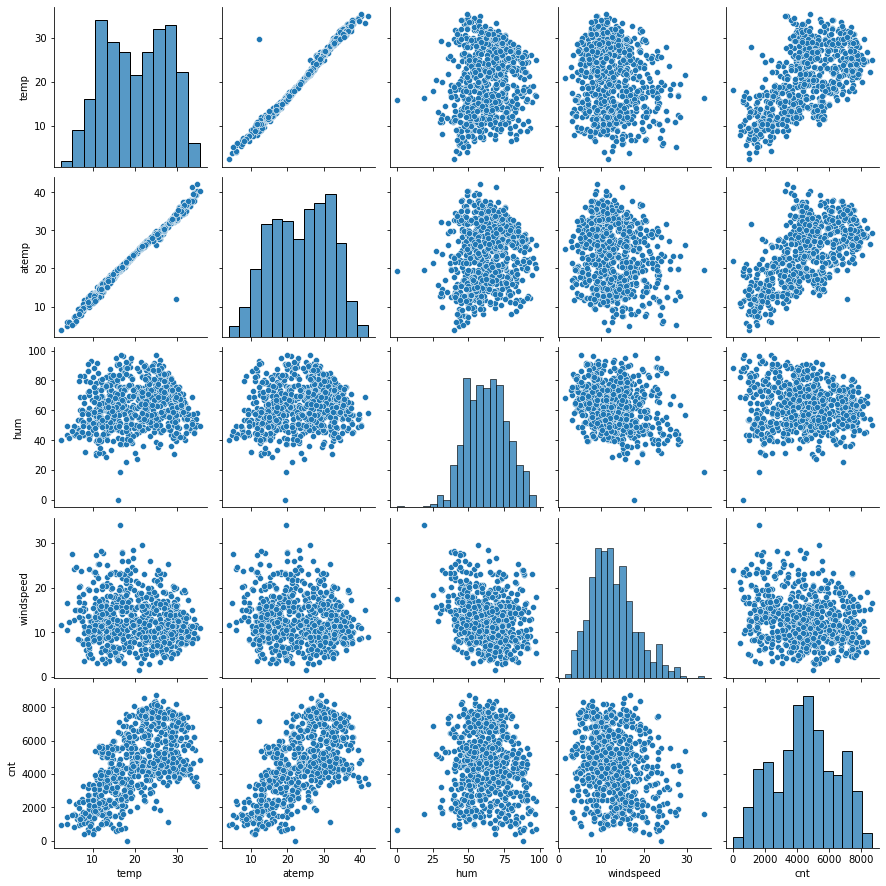

In [43]:
# Visualising the nummeric variables
bike_num=bike[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]
sns.pairplot(bike_num)
plt.show()

<AxesSubplot:xlabel='weathersit', ylabel='cnt'>

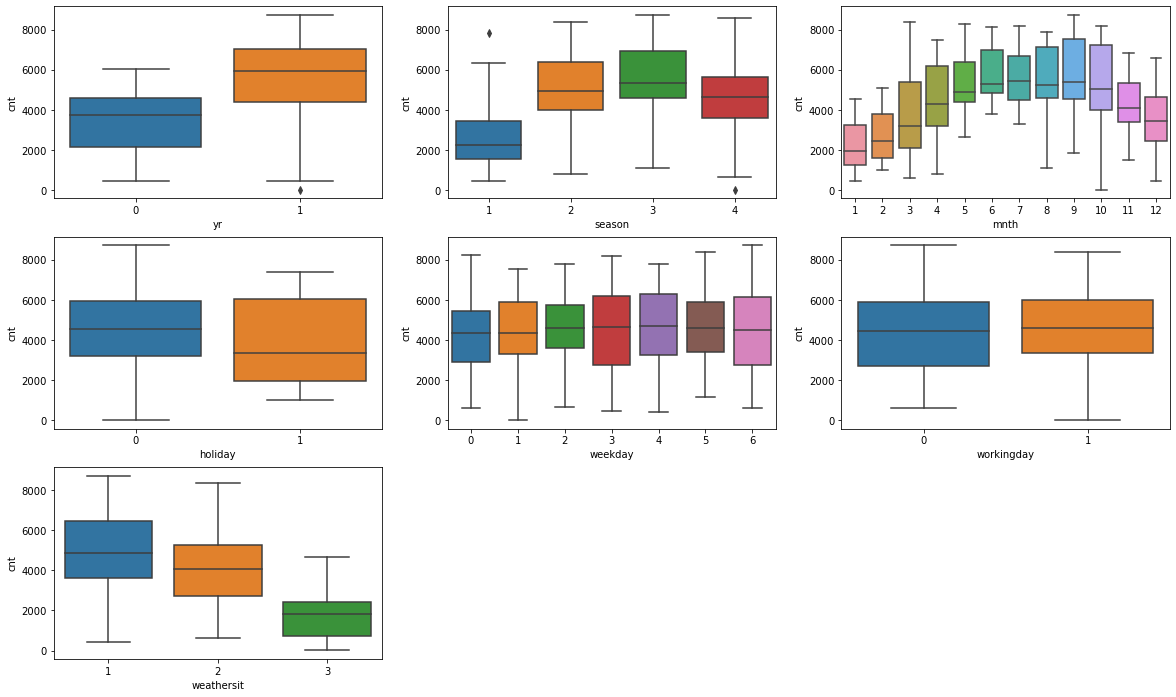

In [44]:
# Visualising the categorical variables
# Box plotcto study their effect on the dependent variable (‘cnt’)
plt.figure(figsize=(20, 12))
plt.subplot(3, 3, 1)
sns.boxplot(x='yr', y='cnt', data=bike)

plt.subplot(3, 3, 2)
sns.boxplot(x='season', y='cnt', data=bike)

plt.subplot(3, 3, 3)
sns.boxplot(x='mnth', y='cnt', data=bike)

plt.subplot(3, 3, 4)
sns.boxplot(x='holiday', y='cnt', data=bike)

plt.subplot(3, 3, 5)
sns.boxplot(x='weekday', y='cnt', data=bike)

plt.subplot(3, 3, 6)
sns.boxplot(x='workingday', y='cnt', data=bike)

plt.subplot(3, 3, 7)
sns.boxplot(x='weathersit', y='cnt', data=bike)


- Number of bike shares increased in 2019
- Least bike sharing count in spring
- cnt values are less during holidays
- cnt values increase in summer

### Step 2: Preparing Data for modelling
#### Splitting into trian and test
#### Rescaling of variables

In [45]:
df_train, df_test = train_test_split(bike_2, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


## Rescaling the features
There are two common ways of rescalling:
1. Min-Max scaling
2. Standardisation (mean-0, sigma-1)

Using MinMax scaling

In [126]:
bike_2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


In [77]:
# 1. Instantiate an object
scaler = MinMaxScaler()

# Create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

# 2. Fit on data 
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
576,0,0,0,0,0,0,0,1,0,0,...,0,0,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658
426,1,0,0,0,0,0,0,0,0,1,...,0,1,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255
728,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096
482,0,1,0,0,0,0,0,0,0,0,...,0,1,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973
111,0,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095


In [128]:
# All numeric variables are now mapped to scale between 0 and 1

In [47]:
df_train.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.243137,0.247059,0.247059,0.096078,0.084314,0.066667,0.088235,0.076471,0.076471,0.098039,...,0.029412,0.345098,0.507843,0.025490,0.676471,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.429398,0.431725,0.431725,0.294988,0.278131,0.249689,0.283915,0.266010,0.266010,0.297660,...,0.169124,0.475867,0.500429,0.157763,0.468282,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Step 3: Training the Model

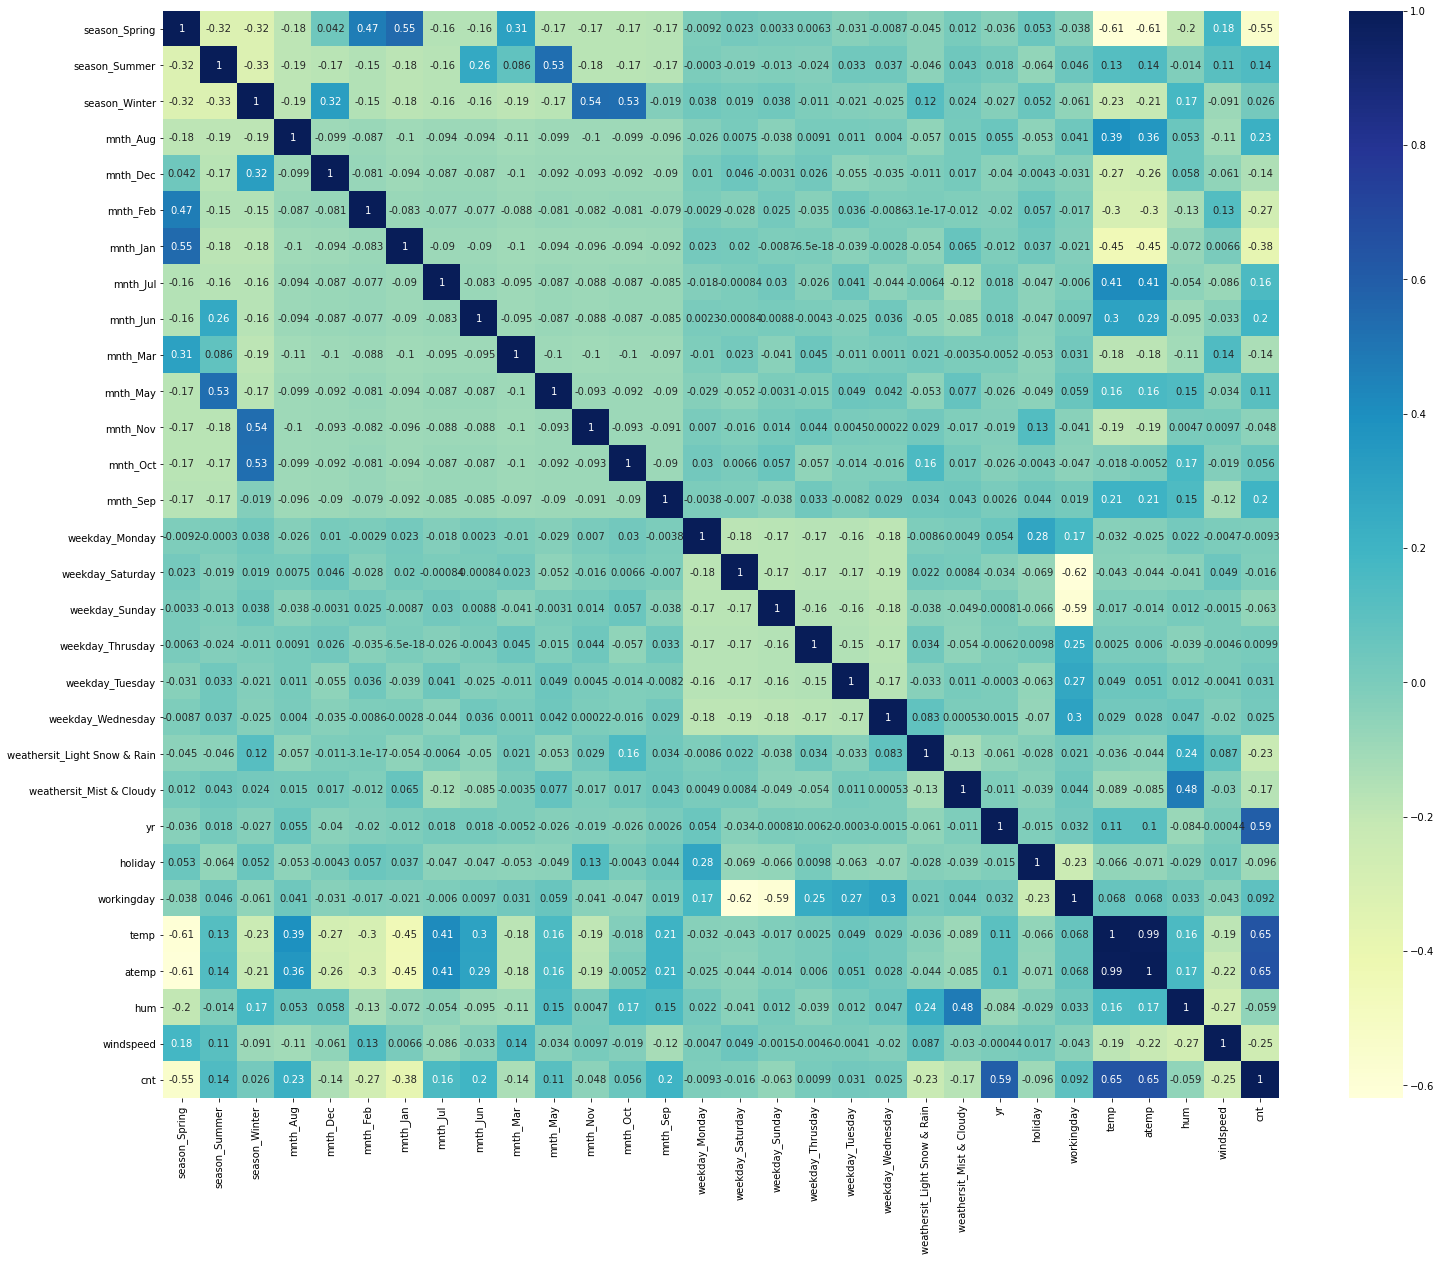

In [48]:
# Heatmap to check the correlation coefficients
plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [49]:
# Dividing into X and Y sets for the model building
# X_train, y_train
y_train = df_train.pop('cnt')
X_train = df_train

### Building a model

In [52]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 13)             
rfe = rfe.fit(X_train, y_train)

In [53]:
# Columns selected by RFE and their weights
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('season_Spring', True, 1),
 ('season_Summer', True, 1),
 ('season_Winter', True, 1),
 ('mnth_Aug', False, 10),
 ('mnth_Dec', False, 5),
 ('mnth_Feb', False, 6),
 ('mnth_Jan', False, 3),
 ('mnth_Jul', True, 1),
 ('mnth_Jun', False, 16),
 ('mnth_Mar', False, 17),
 ('mnth_May', False, 8),
 ('mnth_Nov', False, 4),
 ('mnth_Oct', False, 15),
 ('mnth_Sep', True, 1),
 ('weekday_Monday', False, 11),
 ('weekday_Saturday', True, 1),
 ('weekday_Sunday', False, 9),
 ('weekday_Thrusday', False, 13),
 ('weekday_Tuesday', False, 12),
 ('weekday_Wednesday', False, 14),
 ('weathersit_Light Snow & Rain', True, 1),
 ('weathersit_Mist & Cloudy', True, 1),
 ('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('temp', True, 1),
 ('atemp', False, 7),
 ('hum', True, 1),
 ('windspeed', True, 1)]

### Start with all the columns selected by RFE
### Model 1

In [54]:
# Columns selected by RFE
cols = X_train.columns[rfe.support_]
cols

Index(['season_Spring', 'season_Summer', 'season_Winter', 'mnth_Jul',
       'mnth_Sep', 'weekday_Saturday', 'weathersit_Light Snow & Rain',
       'weathersit_Mist & Cloudy', 'yr', 'holiday', 'temp', 'hum',
       'windspeed'],
      dtype='object')

In [55]:
X_train.columns[~rfe.support_]

Index(['mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan', 'mnth_Jun', 'mnth_Mar',
       'mnth_May', 'mnth_Nov', 'mnth_Oct', 'weekday_Monday', 'weekday_Sunday',
       'weekday_Thrusday', 'weekday_Tuesday', 'weekday_Wednesday',
       'workingday', 'atemp'],
      dtype='object')

In [56]:
# Creating X_train dataframe with RFE selected variables
X_train_rfe = X_train[cols]

In [57]:
# add a constant
X_train_rfe = sm.add_constant(X_train_rfe)

# create first model
lr = sm.OLS(y_train, X_train_rfe)

# Fit
lr_model = lr.fit()

# params 
lr_model.params

const                           0.280276
season_Spring                  -0.056416
season_Summer                   0.053249
season_Winter                   0.097229
mnth_Jul                       -0.057558
mnth_Sep                        0.082971
weekday_Saturday                0.017480
weathersit_Light Snow & Rain   -0.238105
weathersit_Mist & Cloudy       -0.053198
yr                              0.229800
holiday                        -0.093935
temp                            0.530449
hum                            -0.169705
windspeed                      -0.183413
dtype: float64

In [58]:
# summary of linear regression model
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     204.4
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          1.31e-189
Time:                        22:32:47   Log-Likelihood:                 510.56
No. Observations:                 510   AIC:                            -993.1
Df Residuals:                     496   BIC:                            -933.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2803      0.035      8.112      0.000       0.212       0.348
season_Spring                   -0.0564      0.021     -2.706      0.007      -0.097      -0.015
season_Summer                    0.0532      0.015      3.553      0.000       0.024       0.083
season_Winter                    0.0972      0.017      5.629      0.000       0.063       0.131
mnth_Jul                        -0.0576      0.018     -3.144      0.002      -0.094      -0.022
mnth_Sep                         0.0830      0.017      4.963      0.000       0.050       0.116
weekday_Saturday                 0.0175      0.011      1.574      0.116      -0.004       0.039
weathersit_Light Snow & Rain    -0.2381      0.026     -9.037      0.000      -0.290      -0.186
weathersit_Mist & Cloudy        -0.0532      0.010     -5.074      0.000      -0.074      -0.033
yr                               0.2298      0.008     28.287      0.000       0.214       0.246
holiday                         -0.0939      0.026     -3.668      0.000      -0.144      -0.044
temp                             0.5304      0.034     15.768      0.000       0.464       0.597
hum                             -0.1697      0.038     -4.494      0.000      -0.244      -0.096
windspeed                       -0.1834      0.026     -7.128      0.000      -0.234      -0.133
==============================================================================
Omnibus:                       63.217   Durbin-Watson:                   2.053
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              136.046
Skew:                          -0.687   Prob(JB):                     2.87e-30
Kurtosis:                       5.125   Cond. No.                         19.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
# dropping weekday_Saturday has p > 0.05
X_train_new = X_train_rfe.drop(["weekday_Saturday"], axis = 1)

### Model 2

In [61]:
# add a constant
X_train_lr = sm.add_constant(X_train_new)

# create second model
lr = sm.OLS(y_train, X_train_lr)

# Fit
lr_model = lr.fit()

# params 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          2.95e-190
Time:                        22:40:47   Log-Likelihood:                 509.29
No. Observations:                 510   AIC:                            -992.6
Df Residuals:                     497   BIC:                            -937.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.2848      0.034      8.258      0.000       0.217       0.353
season_Spring                   -0.0564      0.021     -2.700      0.007      -0.097      -0.015
season_Summer                    0.0531      0.015      3.536      0.000       0.024       0.083
season_Winter                    0.0976      0.017      5.643      0.000       0.064       0.132
mnth_Jul                        -0.0572      0.018     -3.123      0.002      -0.093      -0.021
mnth_Sep                         0.0833      0.017      4.973      0.000       0.050       0.116
weathersit_Light Snow & Rain    -0.2369      0.026     -8.983      0.000      -0.289      -0.185
weathersit_Mist & Cloudy        -0.0527      0.010     -5.017      0.000      -0.073      -0.032
yr                               0.2294      0.008     28.208      0.000       0.213       0.245
holiday                         -0.0969      0.026     -3.787      0.000      -0.147      -0.047
temp                             0.5299      0.034     15.728      0.000       0.464       0.596
hum                             -0.1726      0.038     -4.569      0.000      -0.247      -0.098
windspeed                       -0.1822      0.026     -7.074      0.000      -0.233      -0.132
==============================================================================
Omnibus:                       57.486   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              130.221
Skew:                          -0.612   Prob(JB):                     5.28e-29
Kurtosis:                       5.151   Cond. No.                         19.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Checking VIF for Multicollinearity

In [63]:
# Calculate the VIFs for the new model
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,74.37
1,season_Spring,5.02
10,temp,3.61
3,season_Winter,3.48
2,season_Summer,2.62
11,hum,1.89
7,weathersit_Mist & Cloudy,1.56
4,mnth_Jul,1.48
5,mnth_Sep,1.30
6,weathersit_Light Snow & Rain,1.24


In [64]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [65]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
10,hum,28.03
9,temp,16.03
11,windspeed,4.65
0,season_Spring,4.01
2,season_Winter,3.33
1,season_Summer,2.79
6,weathersit_Mist & Cloudy,2.28
7,yr,2.08
3,mnth_Jul,1.58
4,mnth_Sep,1.38


In [66]:
X_train_new = X_train_new.drop(['hum'], axis=1)

In [67]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
9,temp,5.09
10,windspeed,4.60
1,season_Summer,2.23
0,season_Spring,2.08
7,yr,2.07
2,season_Winter,1.78
3,mnth_Jul,1.58
6,weathersit_Mist & Cloudy,1.55
4,mnth_Sep,1.34
5,weathersit_Light Snow & Rain,1.08


### Model 3

In [68]:
# add a constant
X_train_lr = sm.add_constant(X_train_new)

# create second model
lr = sm.OLS(y_train, X_train_lr)

# Fit
lr_model = lr.fit()

# params 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Mon, 13 Dec 2021   Prob (F-statistic):          5.06e-187
Time:                        22:50:19   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                            0.1994      0.030      6.746      0.000       0.141       0.258
season_Spring                   -0.0672      0.021     -3.175      0.002      -0.109      -0.026
season_Summer                    0.0465      0.015      3.051      0.002       0.017       0.076
season_Winter                    0.0817      0.017      4.730      0.000       0.048       0.116
mnth_Jul                        -0.0521      0.019     -2.790      0.005      -0.089      -0.015
mnth_Sep                         0.0768      0.017      4.517      0.000       0.043       0.110
weathersit_Light Snow & Rain    -0.2842      0.025    -11.487      0.000      -0.333      -0.236
weathersit_Mist & Cloudy        -0.0802      0.009     -9.146      0.000      -0.097      -0.063
yr                               0.2336      0.008     28.352      0.000       0.217       0.250
holiday                         -0.0975      0.026     -3.736      0.000      -0.149      -0.046
temp                             0.4910      0.033     14.770      0.000       0.426       0.556
windspeed                       -0.1479      0.025     -5.887      0.000      -0.197      -0.099
==============================================================================
Omnibus:                       59.182   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              134.016
Skew:                          -0.629   Prob(JB):                     7.92e-30
Kurtosis:                       5.173   Cond. No.                         17.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Step-4: Residual Analysis

In [71]:
y_train_pred = lr_model.predict(X_train_lr)

<AxesSubplot:ylabel='Density'>

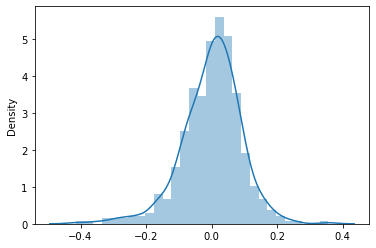

In [72]:
# Distribution of error terms
res = y_train - y_train_pred
sns.distplot(res)


### we have fitted the model and checked the normality of error terms.

In [157]:
bike_2.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,...,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,0,0,0,0,0,1,1,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,0,0,0


# Step-5: Predictions and Evaluation on the Test Set

In [75]:
scaler = MinMaxScaler()

df_train, df_test = train_test_split(bike_2, train_size=0.7, random_state=100)
print(df_train.shape)
print(df_test.shape)

(510, 30)
(220, 30)


In [78]:
# Create a list of numeric variables
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']



# 2. Fit on data 
df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()



,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
184,0,0,0,0,0,0,0,1,0,0,...,0,1,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706
535,0,1,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034
299,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382
221,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400
152,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029


In [79]:
df_test.describe()

,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,mnth_Mar,...,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.254545,0.263636,0.236364,0.059091,0.086364,0.100000,0.077273,0.104545,0.095455,0.054545,...,0.027273,0.318182,0.481818,0.036364,0.700000,0.558718,0.532847,0.638221,0.313293,0.522154
std,0.436599,0.441609,0.425817,0.236333,0.281541,0.300684,0.267633,0.306665,0.294512,0.227609,...,0.163248,0.466833,0.500809,0.187620,0.459303,0.233187,0.217401,0.148694,0.159584,0.219163
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678
75%,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300


In [80]:
# Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

In [81]:
# add a constant
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,season_Spring,season_Summer,season_Winter,mnth_Aug,mnth_Dec,mnth_Feb,mnth_Jan,mnth_Jul,mnth_Jun,...,weekday_Wednesday,weathersit_Light Snow & Rain,weathersit_Mist & Cloudy,yr,holiday,workingday,temp,atemp,hum,windspeed
184,1.0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,0.831783,0.769660,0.657364,0.084219
535,1.0,0,1,0,0,0,0,0,0,1,...,1,0,0,1,0,1,0.901354,0.842587,0.610133,0.153728
299,1.0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0.511964,0.496145,0.837699,0.334206
221,1.0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,1,0.881625,0.795343,0.437098,0.339570
152,1.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0.817246,0.741471,0.314298,0.537414


In [82]:
# predicting using variables used by the final model
test_cols = X_train_lr.columns
X_test = X_test[test_cols[1:]]
# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 184 to 653
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   const                         220 non-null    float64
 1   season_Spring                 220 non-null    uint8  
 2   season_Summer                 220 non-null    uint8  
 3   season_Winter                 220 non-null    uint8  
 4   mnth_Jul                      220 non-null    uint8  
 5   mnth_Sep                      220 non-null    uint8  
 6   weathersit_Light Snow & Rain  220 non-null    uint8  
 7   weathersit_Mist & Cloudy      220 non-null    uint8  
 8   yr                            220 non-null    int64  
 9   holiday                       220 non-null    int64  
 10  temp                          220 non-null    float64
 11  windspeed                     220 non-null    float64
dtypes: float64(3), int64(2), uint8(7)
memory usage: 11.8 KB


In [84]:
# predictions on test set
y_test_pred = lr_model.predict(X_test)

In [85]:
# evaluate
r2_score(y_true=y_test, y_pred=y_test_pred)

0.805268034904855

In [88]:
# Mean squared error
mse = mean_squared_error(y_test, y_test_pred)
mse

0.009310968608097107

## Model Evaluation

Text(0, 0.5, 'y_test_pred')

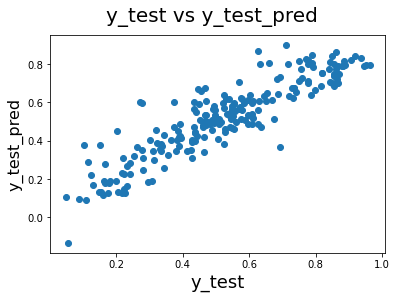

In [89]:
# plot the graph for actual versus predicted values.
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              
plt.xlabel('y_test', fontsize = 18)                        
plt.ylabel('y_test_pred', fontsize = 16) 

The equation of our best fitted line is:

cnt = 0.1994 X const + 0.4910 X temp + 0.2336 X yr + 0.0817 X seasonWinter - 0.0672 X season Spring + 0.0465 X season_Summer -0.0521 X mnth_Jul + 0.0768 X mnth_Sep -0.2842 X weathersit_Light Snow & Rain -0.0802 X weathersit_Mist & Cloudy -0.0975 X holiday -0.1479 X windspeed

# Final Result Comparison
- Train R^2 :0.835

- Test R^2 :0.805

As per final Model, the top 3 predictor variables that influences the bike booking are:

- Temperature (temp) - A coefficient value of ‘0.4910’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.4910 units.
- Weather Situation(weathersit_Light Snow & Rain) - A coefficient value of ‘-0.2842’ indicated that, a unit increase in weathersit_Light Snow & Rain variable decreases the bike hire numbers by 0.2842 units.
- Year (yr) - A coefficient value of ‘0.2336’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2336 units.